### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to know:
 -	Which variables are significant in predicting the price of a car
 -	How well those variables describe the price of a car
 
#### Business Goal
Need to model the price of cars with the available independent variables

In [50]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print(find_encoding('CarPrice_Assignment.csv'))

ascii


## 1. Read the data

In [53]:
df_cars = pd.read_csv('CarPrice_Assignment.csv')

In [54]:
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
df_cars.shape

(205, 26)

In [56]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [57]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 1A. Update the data as per the give DataDictionary

 - As per the given Data dictionary, 'symboling' is categorical variable; But when we want to rebuild the model we need to conver the same into dummyvariables; So instead of converting the current numeric to categorical and again back to dummy (numeric) lets keep the 'symboling' values as it is

In [58]:
# df_cars['symboling'] = df_cars['symboling'].astype(str)

In [59]:
# df_cars.info()

In [60]:
# df_cars.describe()

## 2. Visualize the data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [61]:
colList = list(df_cars.columns)

In [62]:
print(colList, len(colList))

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 26


In [63]:
cat_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype',
       'cylindernumber','fuelsystem']

print(cat_vars, len(cat_vars))

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 9


In [64]:
non_cat_vars = list(set(colList)-set(cat_vars)-set(['price','CarName']))
print(non_cat_vars, len(non_cat_vars))

['carwidth', 'citympg', 'compressionratio', 'stroke', 'carheight', 'enginesize', 'car_ID', 'carlength', 'boreratio', 'symboling', 'horsepower', 'wheelbase', 'curbweight', 'highwaympg', 'peakrpm'] 15


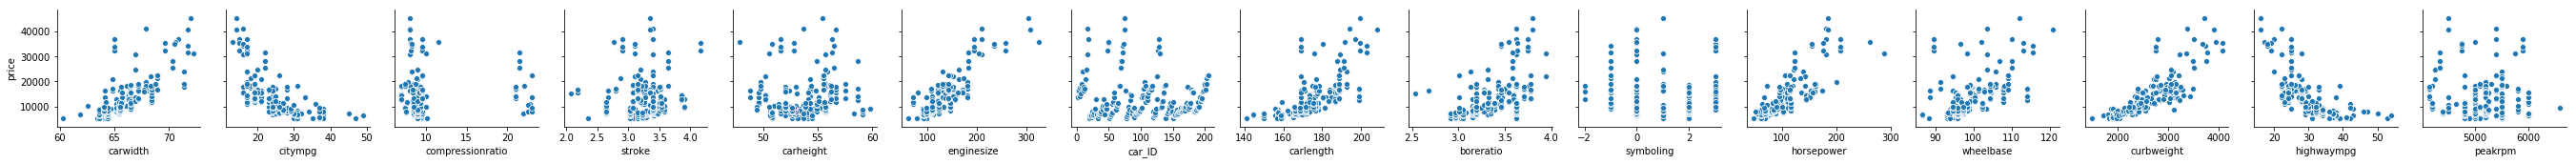

In [65]:
x = non_cat_vars
y = colList[-1]

sns.pairplot(df_cars, x_vars=x, y_vars=y, aspect=1)
plt.savefig('price-vs-others.png')

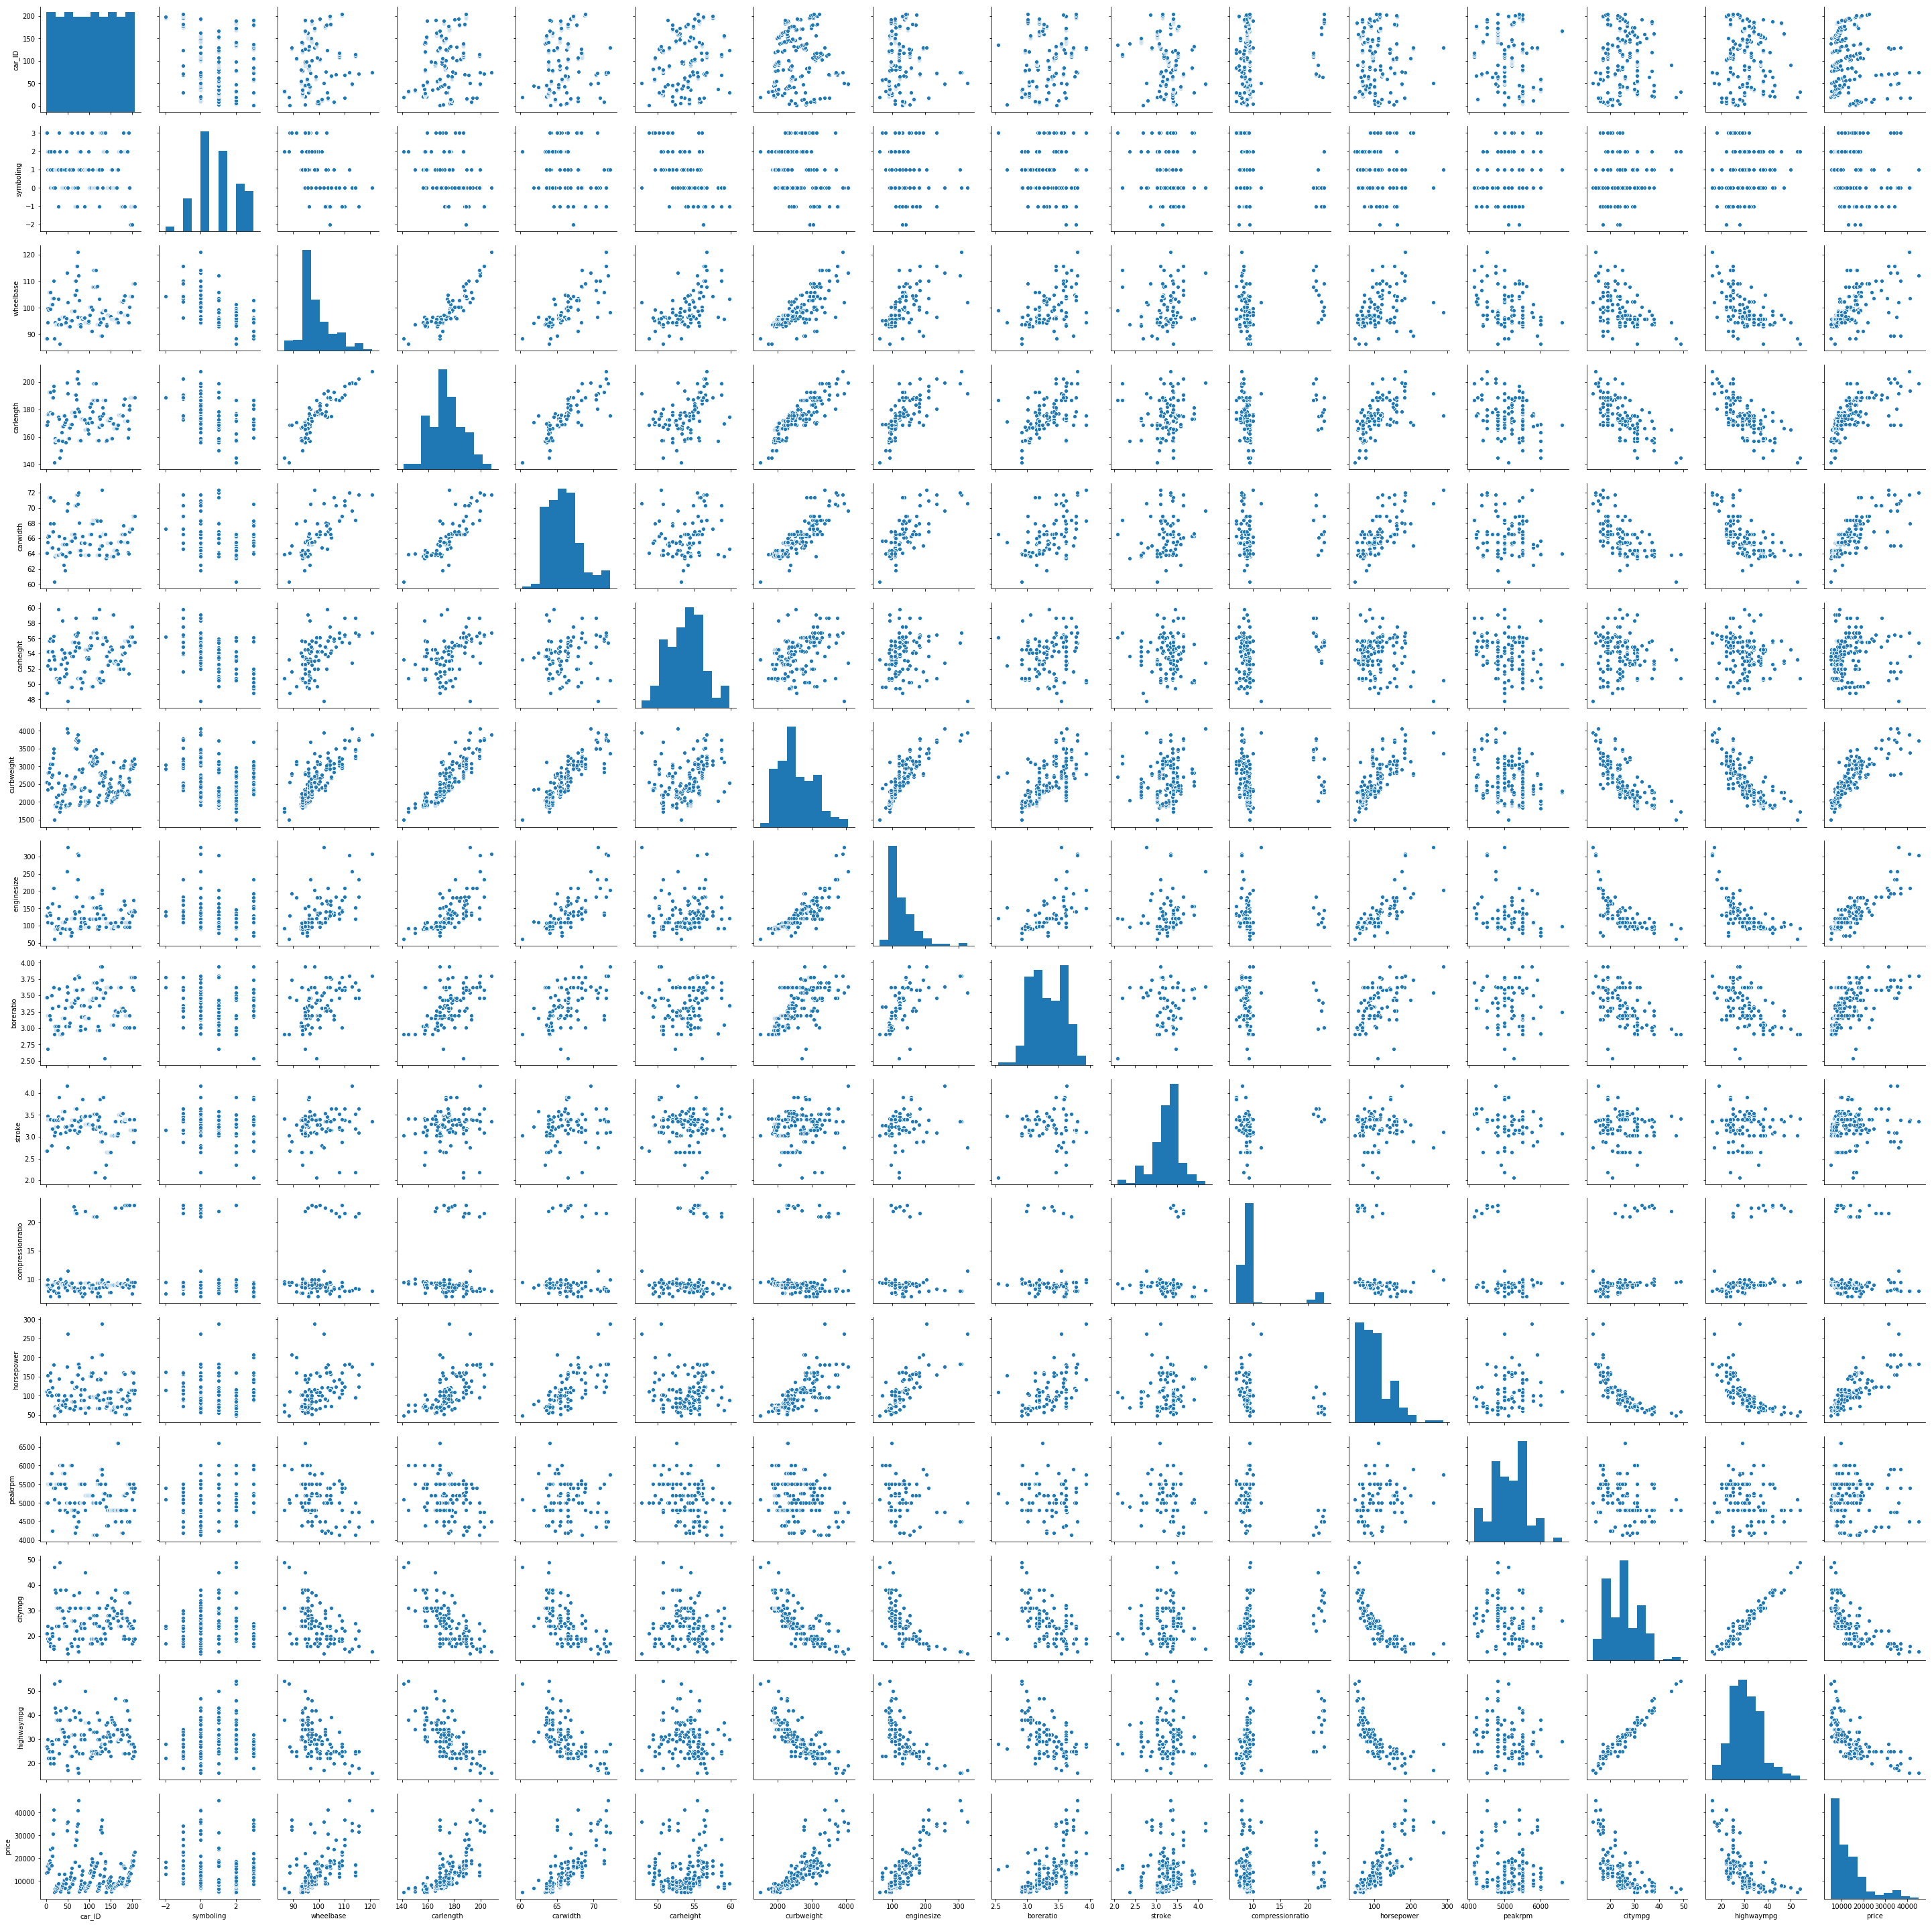

In [66]:
sns.pairplot(df_cars)
plt.savefig('pairplot-raw.png')

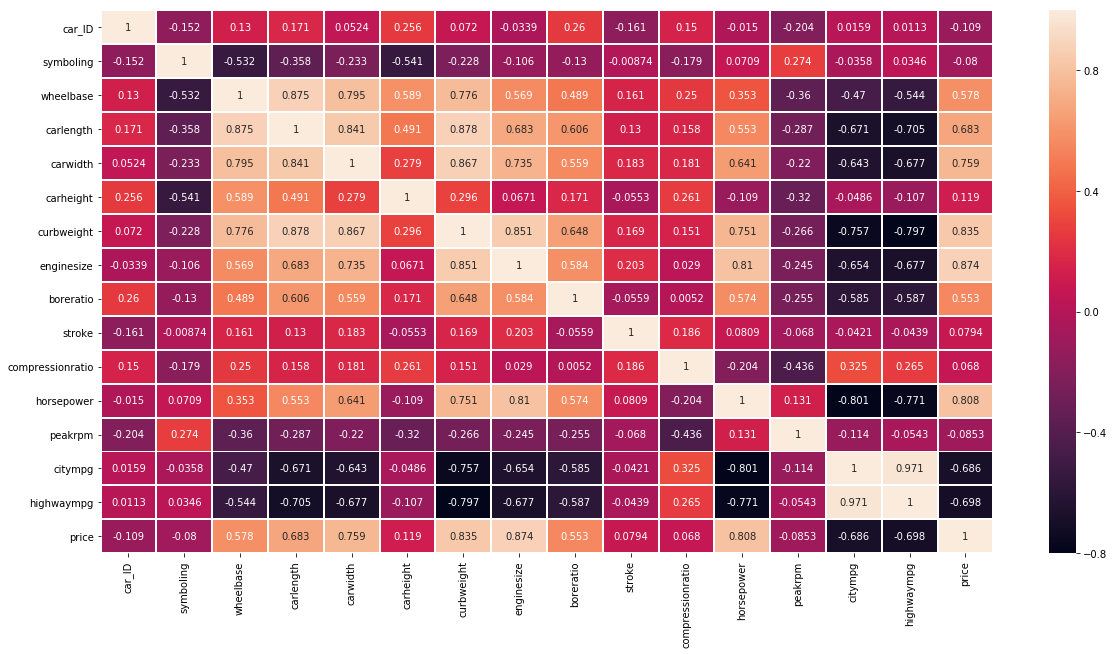

In [67]:
plt.figure(figsize = (20,10))  
# sns.heatmap(pd.DataFrame.round(df_cars.corr(), 3), annot=True,fmt='.2g',linewidths=1)
sns.heatmap(df_cars.corr(), annot=True,fmt='.3g',linewidths=1)
plt.savefig('heatmap-raw.png')

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [68]:
print(cat_vars, len(cat_vars))

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 9


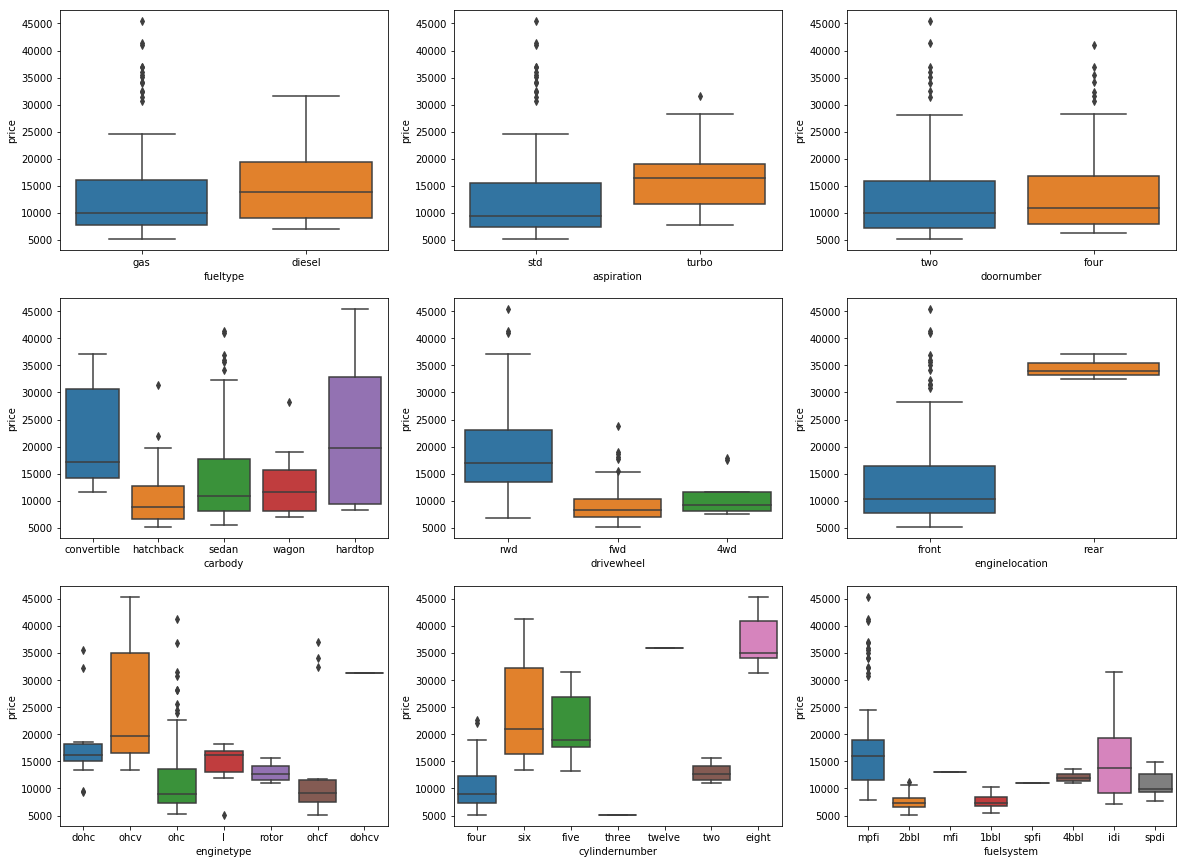

In [69]:
plt.figure(figsize=(20, 15))

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=cat_vars[i-1], y='price', data=df_cars)

plt.show()

### 3. Data Cleanup
    - Dealing with Variables which are plain numeric values
    - Dealing with CarName    
    - Dealing with Categorical Variables
    

In [70]:
def convert_to_num(x):
    return x.map({"one":1,"two":2,"three":3, "four":4, "five":5, "six":6, "eight":8,"twelve":12})

In [71]:
varlist =  ['doornumber','cylindernumber']

# Applying the function to the housing list
df_cars[varlist] = df_cars[varlist].apply(convert_to_num)

#### binary variables(Having only two values) - 
    --'fueltype', 
    --'aspiration',
    --'enginelocation',

- Lets convert the binary variables to numeric system

In [72]:
def convert_fuel(x):
    return x.map({"gas":1,"diesel":0})

In [73]:
def convert_aspiration(x):
    return x.map({"std":1,"turbo":0})

In [74]:
def convert_enginelocation(x):
    return x.map({"front":1,"rear":0})

In [75]:
df_cars[['aspiration']] = df_cars[['aspiration']].apply(convert_aspiration)

In [76]:
df_cars[['fueltype']] = df_cars[['fueltype']].apply(convert_fuel)

In [77]:
df_cars[['enginelocation']] = df_cars[['enginelocation']].apply(convert_enginelocation)

In [78]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm           

In [79]:
df_cars.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.819512,3.121951,0.985366,98.756585,174.049268,65.907805,53.724878,...,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.385535,0.994966,0.120377,6.021776,12.337289,2.145204,2.443522,...,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,1.000000,1.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,...,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,97.000000,173.200000,65.500000,54.100000,...,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,1.000000,1.000000,4.000000,1.000000,102.400000,183.100000,66.900000,55.500000,...,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,4.000000,1.000000,120.900000,208.100000,72.300000,59.800000,...,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


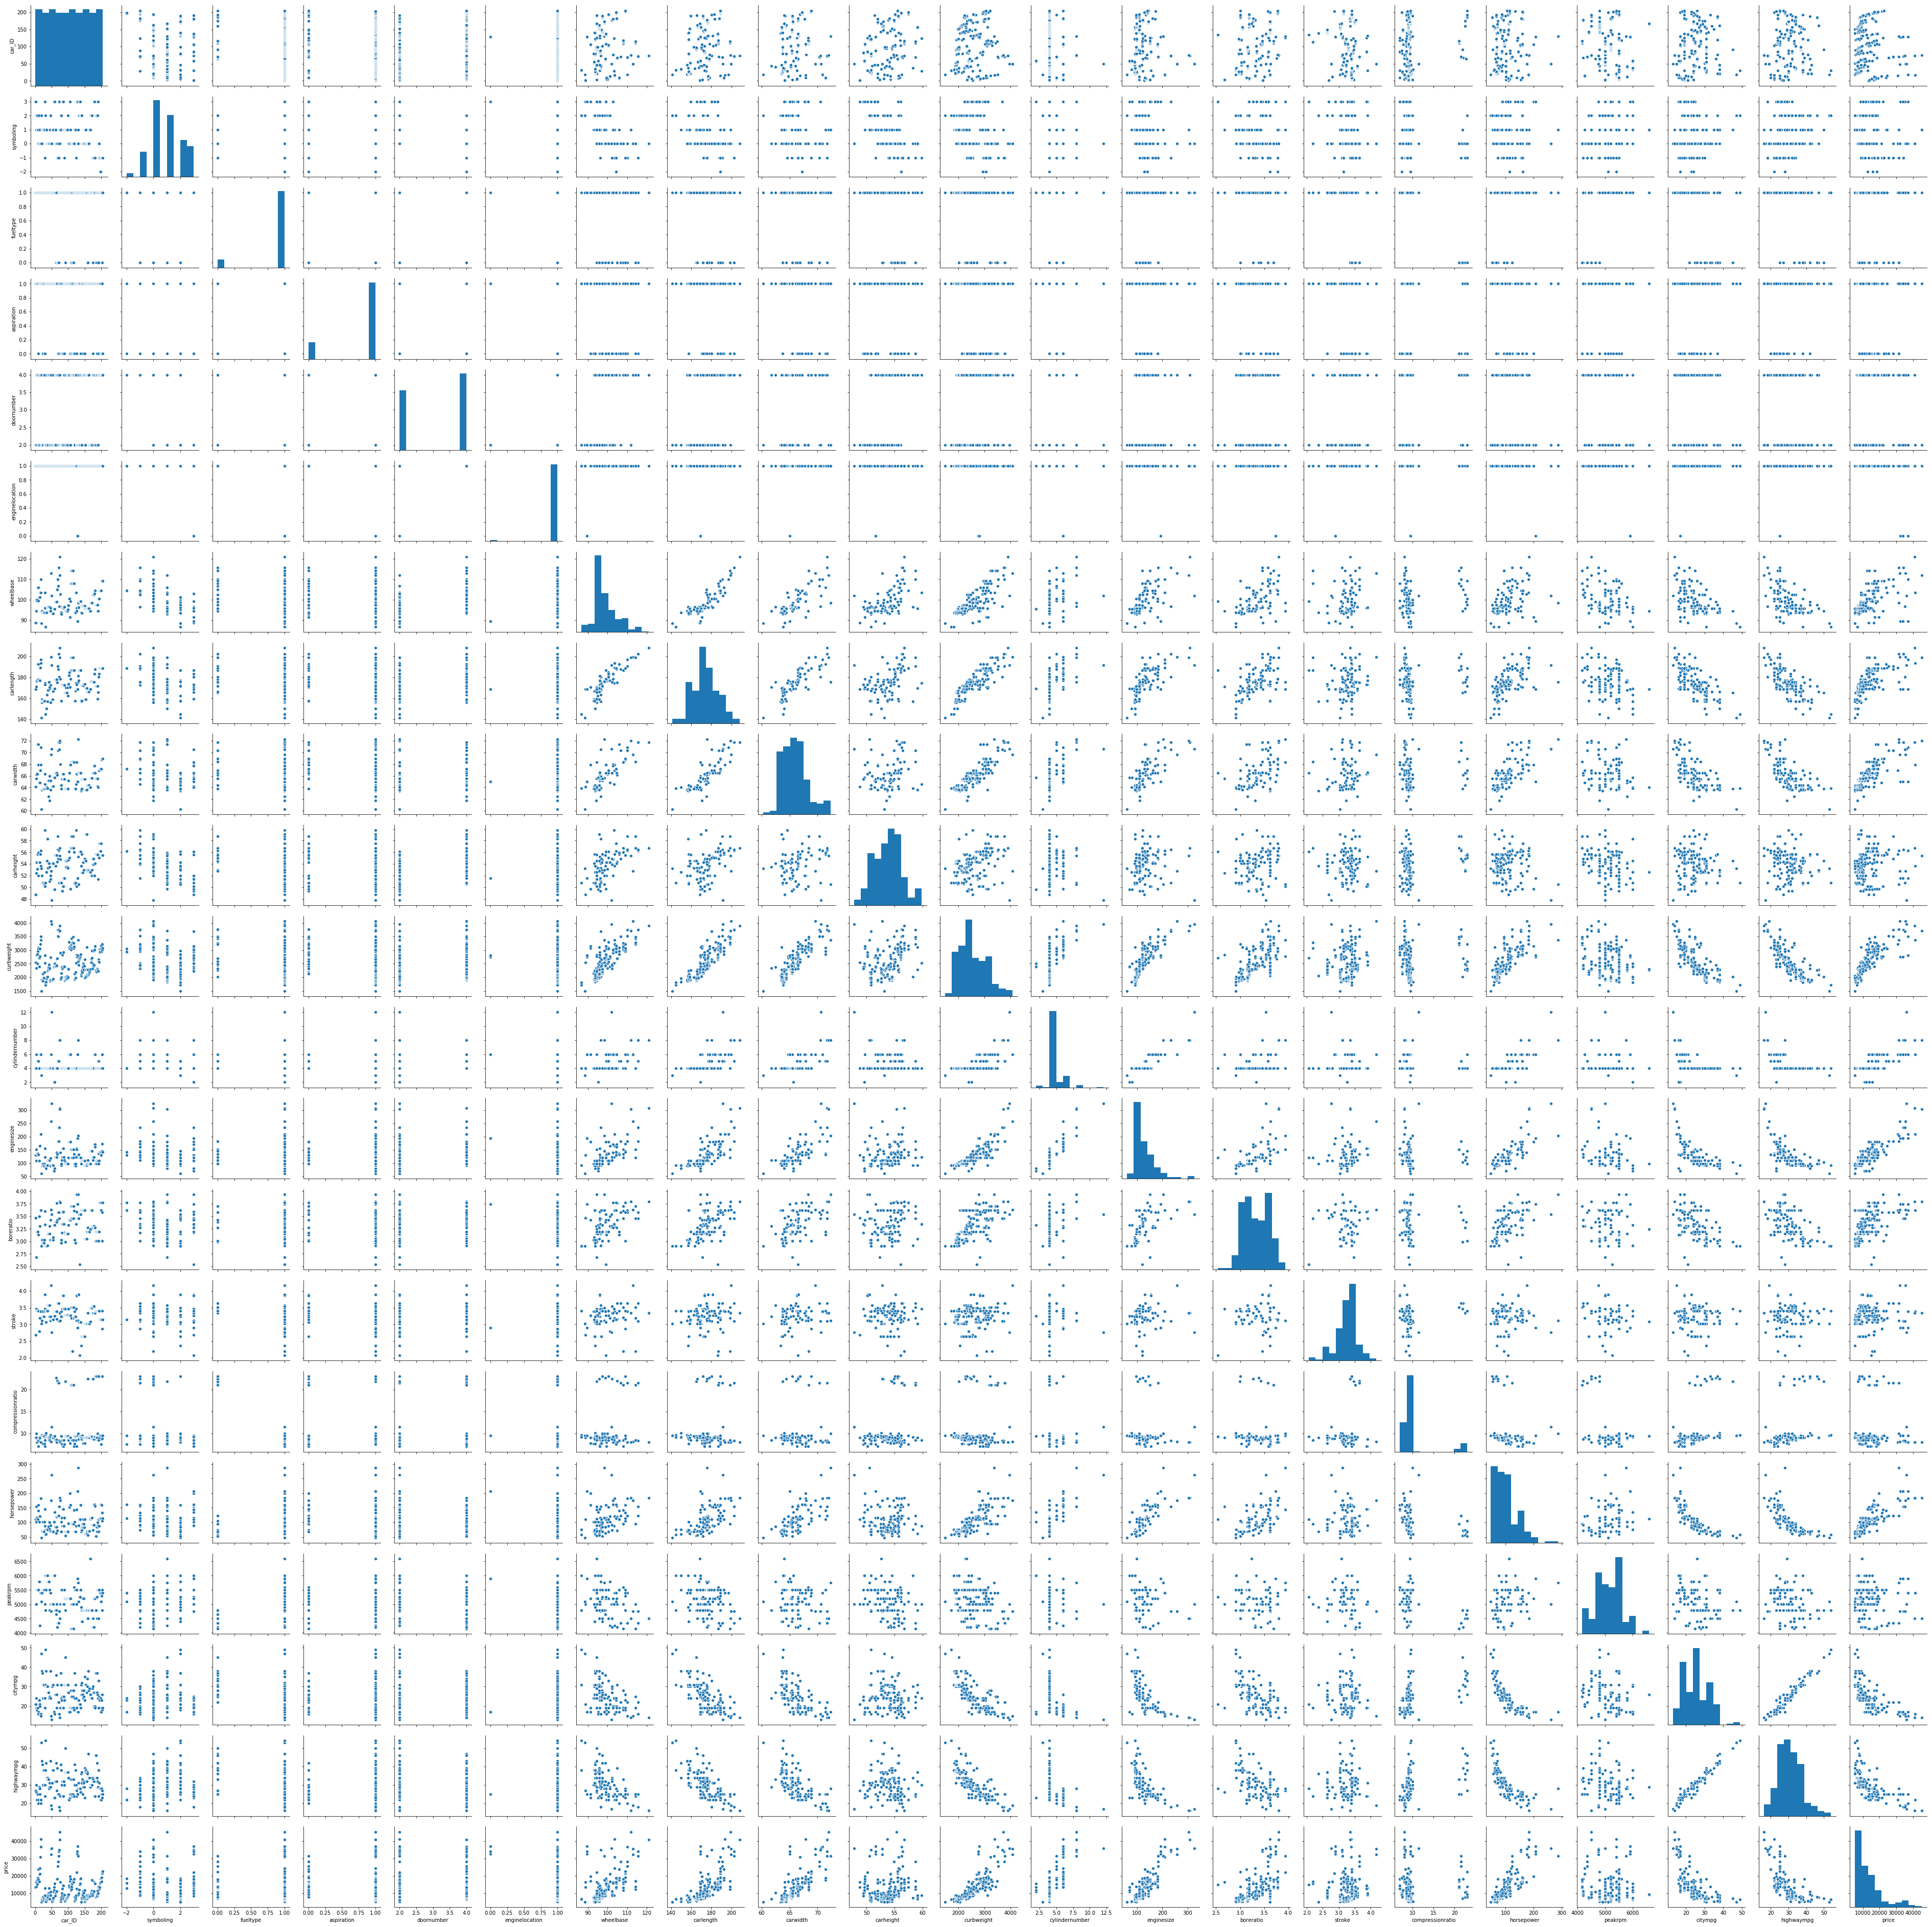

In [80]:
sns.pairplot(df_cars)
plt.savefig('pairplot-all.png')

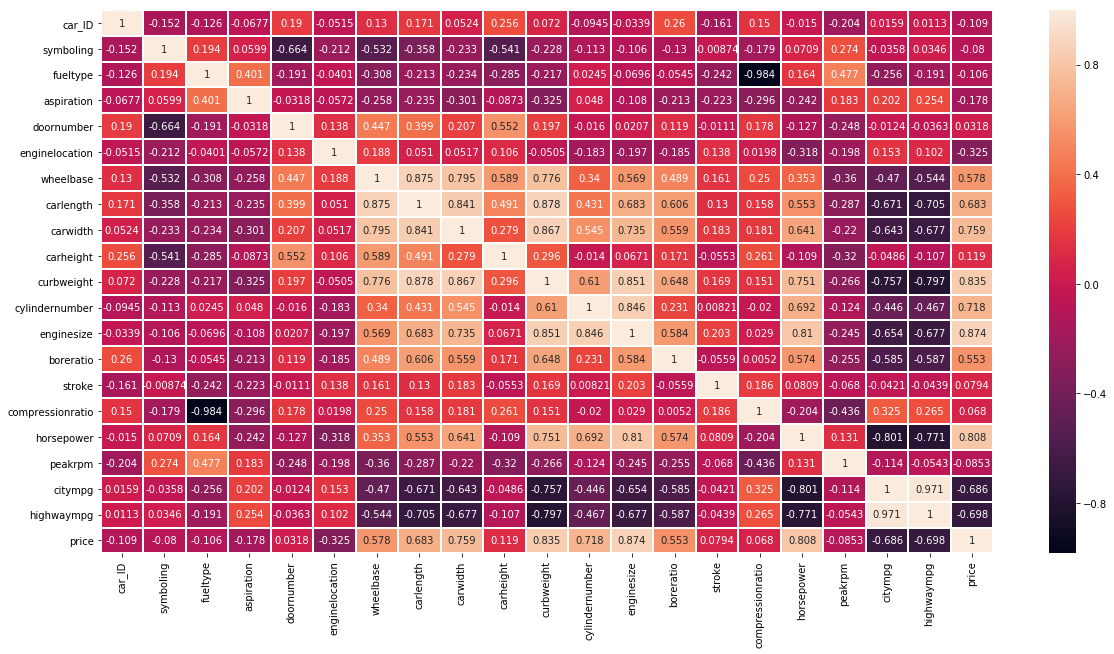

In [81]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_cars.corr(), annot=True,fmt='.3g',linewidths=1)
plt.savefig('heatmap-raw.png')

- Some Strong corelations exists between independant variables

    - wheelbase - carlength, carwidth, curbweight
    
    - carlength - wheelbase, carwidth, curbweight
    
    - carwidth - wheelbase, carlength, curbweight
    
    - enginesize - curbweight, cylindernumber
    
    - horsepower - enginesize
    
    - citympg - higwaympg


In [83]:
df_cars.to_csv('cars.csv')

#### Creating dummy variables

Left of categorical variables shall be converted by means of pandas::get_dummies
        - 'carbody'
        - 'drivewheel'
        - 'enginetype'
        - 'fuelsystem'
        
No Need to create individual dummy variables.

In [121]:
# d_carbody = pd.get_dummies(df_cars['carbody'], drop_first=True)

In [122]:
# d_drivewheel = pd.get_dummies(df_cars['drivewheel'], drop_first=True)

In [123]:
# d_enginetype = pd.get_dummies(df_cars['enginetype'], drop_first=True)

In [110]:
# sum(list(map(lambda x : len(set(x))==1,d_fuelsystem.values)))

In [124]:
# d_fuelsystem = pd.get_dummies(df_cars['fuelsystem'], drop_first=True)

In [120]:
# d_fuelsystem.info()

In [126]:
cat_vars = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem']
df_final = pd.get_dummies(df_cars, columns=cat_vars, drop_first=True)
df_final.to_csv('cars_dummies.csv')

In [127]:
print(df_final.columns, len(df_final.columns))

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object') 41


#### Dealing with CarName

In [153]:
def carNameToCarMake(x):
    if " " in x:
        return x.split(" ", 1)[0]
    return x


From the data we can observe case is not consistent
- Convert to lower case

In [162]:
# carNameToCarMake('alfa 100')

In [163]:
df_final['CarName'] = df_final['CarName'].str.lower()

In [164]:
df_final['CarName'] = df_final['CarName'].map(carNameToCarMake)

In [166]:
pd.unique(df_final.CarName)

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# TODO - check if one conversion can be possible
# may be by using map

In [167]:
df_final['CarName'] = df_final['CarName'].str.replace('vw','volkswagen')
df_final['CarName'] = df_final['CarName'].str.replace('vokswagen','volkswagen')
df_final['CarName'] = df_final['CarName'].str.replace('toyouta','toyota')
df_final['CarName'] = df_final['CarName'].str.replace('porcshce','porsche')
df_final['CarName'] = df_final['CarName'].str.replace('maxda','mazda')

In [168]:
df_final.to_csv('car_dummies.csv')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.